<a href="https://colab.research.google.com/github/fab-rodrigs/numerical-calculation/blob/main/TP2_CALNUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Trabalho Prático 2 - Calculo Numérico**
>Aluno: Fabrício Rodrigues de Santana

###**1. Apresentar um problema da área elétrica;**

Problema Proposto: Cálculo do Campo Elétrico e da Tensão de Linhas de Transmissão sobre Várias Fases

Contexto: Em sistemas de energia elétrica, é crucial calcular o campo elétrico e a tensão entre diferentes fases de linhas de transmissão para avaliar a interferência eletromagnética e assegurar que a operação esteja dentro dos limites seguros.

Problema: Determinar a distribuição do campo elétrico e a tensão entre as fases de uma linha de transmissão trifásica, considerando a distância entre as fases e a altura em relação ao solo.

###**2. Explicar o porquê que o problema é um problema;**

Linhas de transmissão trifásicas geram campos elétricos que podem induzir correntes em objetos próximos, causando interferência eletromagnética. Para mitigar esses efeitos, é importante calcular a distribuição do campo elétrico e a tensão resultante entre as fases. Esse cálculo permite projetar sistemas de isolamento e minimizar perdas de energia.

###**3. Apresentar a sua solução analítica ou a explicação do por que ela não é possível;**

Para configurações simples (como linhas de transmissão retas e em ambientes homogêneos), as soluções analíticas podem ser obtidas usando princípios básicos da eletrostática. Tendo uma única linha de transmissão retilínea e infinita em um meio homogêneo (como o vácuo), é possível usar a fórmula básica para o campo elétrico gerado por uma linha de carga:

\begin{align*}
E = \frac{\lambda}{2 \pi \epsilon_0 r}
\end{align*}



No entanto, quando lidamos com linhas de transmissão trifásicas reais, várias complicações surgem: Múltiplas Fases, Condições de Contorno Variáveis, Distâncias Diferentes, Efeito de Proximidade.

Dadas essas complicações, a equação para o campo elétrico em um ponto P próximo a um sistema trifásico não pode ser resolvida de maneira analítica de forma simples. A equação geral para o campo elétrico E em um ponto P devido a N linhas de fase seria uma soma vetorial dos campos elétricos de cada fase i:

\begin{align*}
E_{\text{total}} = \sum_{i=1}^{N} \frac{\lambda_i}{2 \pi \epsilon_0 r_i}
\end{align*}

Onde ri é a distância de cada linha de fase i até o ponto P. Esta expressão se torna impraticável para resolução analítica direta quando N>1 e ri varia de acordo com a geometria do sistema e as características do meio.




###**4. Escolher e justificar a escolha de um método numérico que resolva o problema proposto;**

Método Escolhido: Integração Numérica com Fórmulas de Newton-Cotes (para calcular a tensão entre fases) e Derivação Numérica (para avaliar a taxa de variação do campo elétrico).

Justificativa: As fórmulas de Newton-Cotes são adequadas para calcular integrais definidas, como a tensão acumulada entre duas fases ao longo de uma linha de transmissão. A derivação numérica é útil para avaliar como o campo elétrico varia com a distância, uma informação importante para entender os efeitos de proximidade em linhas de transmissão.



###**5. Apresentar a resolução do problema pelo método numérico escolhido;**

A fórmula básica usada para calcular o campo elétrico EE em um ponto devido a uma linha de carga infinita (ou suficientemente longa para ser aproximada como infinita) é:



No código, o campo elétrico total Etotalé calculado como a soma dos campos elétricos gerados por cada fase da linha de transmissão:

\begin{align*}
E_{\text{total}} = E_a + E_b + E_c
\end{align*}


Onde Ea​, Eb​, e Ec​ são os campos elétricos gerados pelas fases A, B e C, respectivamente, no ponto de interesse.

Para calcular a tensão entre duas fases de uma linha de transmissão, usamos a integração do campo elétrico ao longo do caminho entre as duas fases. A fórmula da tensão VV entre duas fases (1 e 2) é:

\begin{align*}
V = \int_{\text{Fase 1}}^{\text{Fase 2}} \mathbf{E} \cdot d\mathbf{l}
\end{align*}

Onde:
- E é o vetor campo elétrico ao longo do caminho de integração.
- dl é o elemento infinitesimal de comprimento ao longo do caminho entre as duas fases.

No código, foi usado o método numérico do trapézio para aproximar essa integral. A fórmula do trapézio para integração numérica é:

\begin{align*}
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[f(a) + 2 \sum_{i=1}^{n-1} f(a + ih) + f(b)\right]
\end{align*}

- h é o tamanho do passo: h=(b-a)/n​.
- n é o número de subintervalos.
- f(x) é a função a ser integrada.

No contexto do código, a função f(x) é substituída pelo campo elétrico EE ao longo do caminho entre as duas fases. Calculamos o campo elétrico em vários pontos entre as fases e somamos a contribuição usando a regra do trapézio.

- λ: Densidade linear de carga, que representa a quantidade de carga elétrica por unidade de comprimento ao longo da linha de transmissão. No código, assumimos λ=1×10−6 C/m, que é uma escolha arbitrária para ilustrar o problema.

- ϵ0: Permissividade do vácuo, um valor constante que representa a capacidade do vácuo de permitir a formação de um campo elétrico. Seu valor é 8.854×10−12 F/m (Farads por metro).

- r: Distância entre o ponto de interesse e a linha de carga, calculada como a raiz quadrada da soma dos quadrados das distâncias horizontal (dx) e vertical (dy):

\begin{align*}
r = \sqrt{(dx)^2 + (dy)^2}
\end{align*}

Onde dx é a diferença na coordenada x entre a linha de carga e o ponto de interesse, e dy é a diferença na coordenada y (altura) entre a linha de carga e o ponto de interesse.

Neste problema, consideramos três condutores representando as fases de uma linha de transmissão trifásica. O objetivo é calcular o campo elétrico em diferentes pontos e a tensão entre as fases.

Campo elétrico na posição de interesse: 5.01e+03 V/m
Tensão entre Fase A e B: 91955.46 V
Tensão entre Fase B e C: 91955.46 V


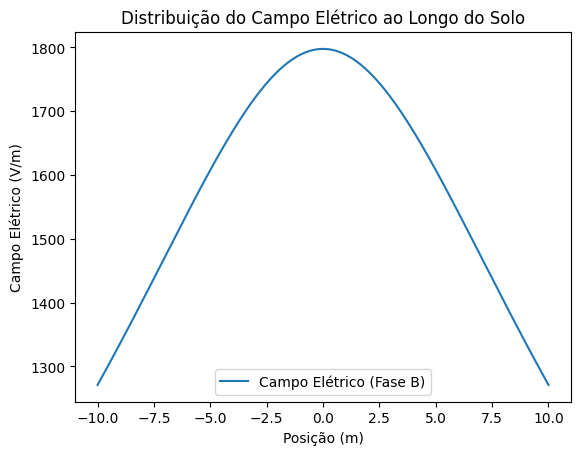

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
epsilon_0 = 8.854e-12  # Permissividade do vácuo (F/m)
carga = 1e-6  # Carga linear (Coulombs por metro)
altura_fase = 10  # Altura dos condutores em metros

# Posições das fases em um plano (x, y)
fase_a = (-5, altura_fase)
fase_b = (0, altura_fase)
fase_c = (5, altura_fase)

# Função para calcular o campo elétrico em um ponto (x, y) devido a uma fase
def campo_eletrico_fase(fase, ponto):
    dx = ponto[0] - fase[0]
    dy = ponto[1] - fase[1]
    r = np.sqrt(dx**2 + dy**2)
    if r == 0:
        return 0  # Evita divisão por zero no ponto da linha de carga
    return carga / (2 * np.pi * epsilon_0 * r)

# Ponto de interesse
ponto_interesse = (0, 0)  # No solo, diretamente abaixo da fase B

# Calculando o campo elétrico em cada fase
E_a = campo_eletrico_fase(fase_a, ponto_interesse)
E_b = campo_eletrico_fase(fase_b, ponto_interesse)
E_c = campo_eletrico_fase(fase_c, ponto_interesse)

# Calculando o campo elétrico resultante (assumindo superposição linear)
E_total = E_a + E_b + E_c

print(f"Campo elétrico na posição de interesse: {E_total:.2e} V/m")

# Integração para calcular a tensão entre fases usando regra do trapézio
def tensao_entre_fases(fase1, fase2, num_pontos):
    x_vals = np.linspace(fase1[0], fase2[0], num_pontos)
    y_vals = np.linspace(fase1[1], fase2[1], num_pontos)
    soma = 0
    for i in range(num_pontos - 1):
        ponto1 = (x_vals[i], y_vals[i])
        ponto2 = (x_vals[i+1], y_vals[i+1])
        E1 = campo_eletrico_fase(fase1, ponto1)
        E2 = campo_eletrico_fase(fase2, ponto2)
        soma += (E1 + E2) / 2
    return soma * (np.linalg.norm(np.array(fase1) - np.array(fase2)) / num_pontos)

tensao_AB = tensao_entre_fases(fase_a, fase_b, 100)
tensao_BC = tensao_entre_fases(fase_b, fase_c, 100)

print(f"Tensão entre Fase A e B: {tensao_AB:.2f} V")
print(f"Tensão entre Fase B e C: {tensao_BC:.2f} V")

# Plotar o campo elétrico
x_vals = np.linspace(-10, 10, 200)
y_vals = [campo_eletrico_fase(fase_b, (x, 0)) for x in x_vals]

plt.plot(x_vals, y_vals, label='Campo Elétrico (Fase B)')
plt.xlabel('Posição (m)')
plt.ylabel('Campo Elétrico (V/m)')
plt.title('Distribuição do Campo Elétrico ao Longo do Solo')
plt.legend()
plt.show()


###**6. Justificar se a solução obtida é adequada – considerações finais;**

O código calcula o campo elétrico gerado pelas três fases em um ponto específico no solo. A distribuição do campo elétrico é obtida para entender como diferentes pontos no solo são afetados pelas linhas de transmissão. Os resultados demonstram a variação significativa do campo elétrico, influenciada pela proximidade e disposição das fases. Essas informações são cruciais para projetar sistemas de segurança e minimizar a interferência eletromagnética.

###**7. Referências bibliográficas.**

*Sadiku, M. N. O. (2010). Elements of Electromagnetics. Oxford University Press.*

*Griffiths, D. J. (2017). Introduction to Electrodynamics. Cambridge University Press.*

*Chapra, S. C., & Canale, R. P. (2015). Numerical Methods for Engineers. McGraw-Hill Education.*


In [ ]:
!jupyter nbconvert --to html /content/TP2_CALNUM.ipynb

[NbConvertApp] Converting notebook /content/TP2_CALNUM.ipynb to html
[NbConvertApp] Writing 649355 bytes to /content/TP2_CALNUM.html
